In [1]:
import pandas as pd
df=pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [8]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [9]:
df[df.duplicated()]

,date,Ex_rate


<Axes: >

<Figure size 1200x400 with 0 Axes>

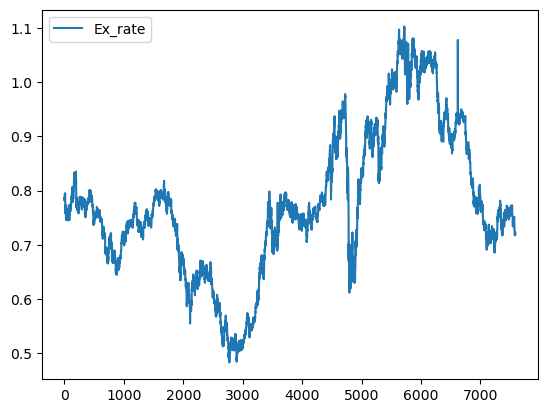

In [40]:
import matplotlib.pyplot as plt

# line plot
df.plot()

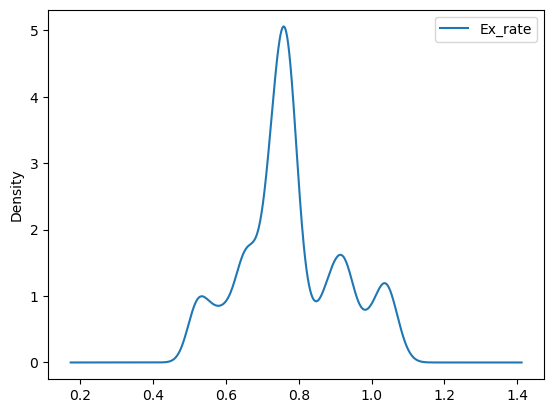

In [7]:

# create a density plot
from matplotlib import pyplot
df.plot(kind='kde')
pyplot.show()


In [41]:
df.insert(0, 'serial_number', range(1, len(df) + 1))
df

,serial_number,date,Ex_rate
0,1,01-01-1990 00:00,0.785500
1,2,02-01-1990 00:00,0.781800
2,3,03-01-1990 00:00,0.786700
3,4,04-01-1990 00:00,0.786000
4,5,05-01-1990 00:00,0.784900
...,...,...,...
7583,7584,06-10-2010 00:00,0.718494
7584,7585,07-10-2010 00:00,0.721839
7585,7586,08-10-2010 00:00,0.723197
7586,7587,09-10-2010 00:00,0.720825


In [42]:
# the date column in "%d-%m-%Y %H:%M" formate

import datetime
df['date'] = df['date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M').date())
df

,serial_number,date,Ex_rate
0,1,1990-01-01,0.785500
1,2,1990-01-02,0.781800
2,3,1990-01-03,0.786700
3,4,1990-01-04,0.786000
4,5,1990-01-05,0.784900
...,...,...,...
7583,7584,2010-10-06,0.718494
7584,7585,2010-10-07,0.721839
7585,7586,2010-10-08,0.723197
7586,7587,2010-10-09,0.720825


In [43]:

df['Month'] = pd.to_datetime(df['date']).dt.month
df['Year'] = pd.to_datetime(df['date']).dt.year
df

,serial_number,date,Ex_rate,Month,Year
0,1,1990-01-01,0.785500,1,1990
1,2,1990-01-02,0.781800,1,1990
2,3,1990-01-03,0.786700,1,1990
3,4,1990-01-04,0.786000,1,1990
4,5,1990-01-05,0.784900,1,1990
...,...,...,...,...,...
7583,7584,2010-10-06,0.718494,10,2010
7584,7585,2010-10-07,0.721839,10,2010
7585,7586,2010-10-08,0.723197,10,2010
7586,7587,2010-10-09,0.720825,10,2010


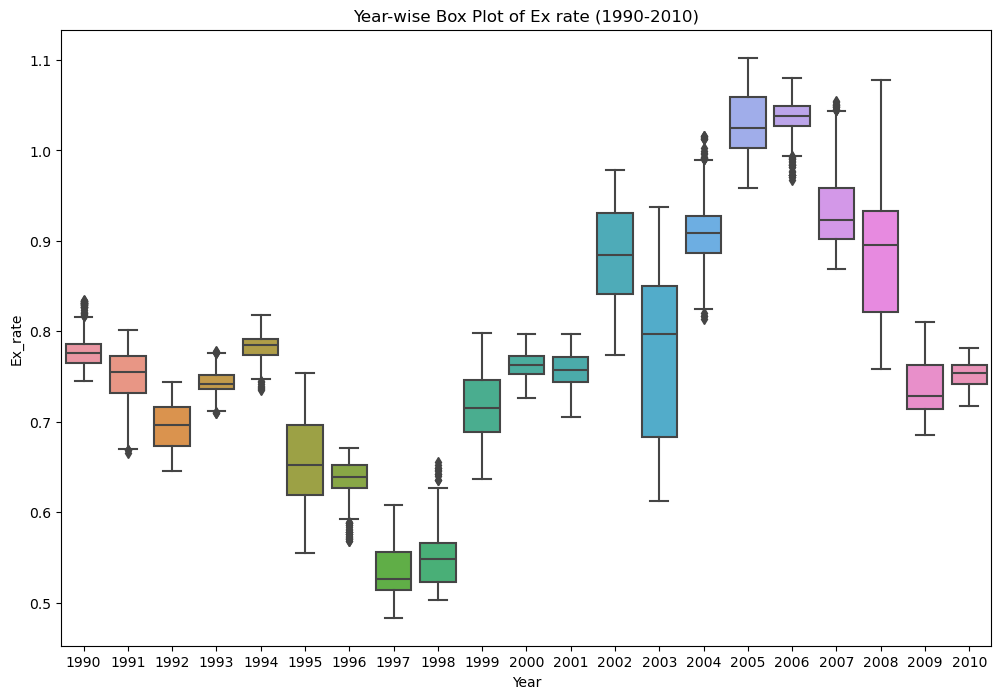

In [29]:
# Create a box plot using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Year'], y=df['Ex_rate'], data=df)
plt.xlabel('Year')
plt.ylabel('Ex_rate')
plt.title('Year-wise Box Plot of Ex rate (1990-2010)')
plt.show()


C:\Users\jalli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jalli\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Ex_rate'>

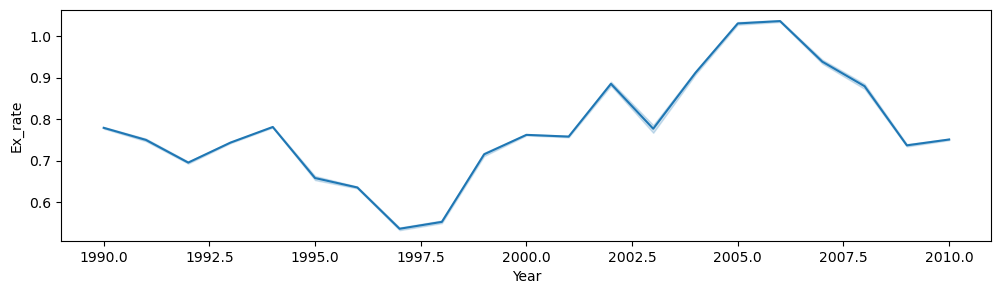

In [52]:
# line plot for every year
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Ex_rate",data=df)

In [47]:
heatmap_y_month = pd.pivot_table(data=df,values="Ex_rate",index="Year",columns="Month",fill_value=0)
heatmap_y_month

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1990,0.773874,0.757486,0.760365,0.770110,0.789684,0.816443,0.807297,0.771119,0.777760,0.777971,0.778460,0.766171
1991,0.772119,0.785736,0.792374,0.776467,0.748477,0.756667,0.759997,0.756529,0.742997,0.721003,0.706063,0.682458
1992,0.689723,0.709566,0.681584,0.680250,0.659955,0.662647,0.668061,0.698074,0.713900,0.714435,0.732433,0.732984
1993,0.742000,0.738511,0.760977,0.768450,0.743348,0.732850,0.724781,0.723694,0.742160,0.756184,0.746493,0.741906
1994,0.752506,0.778346,0.793081,0.791550,0.784613,0.791943,0.791835,0.797623,0.769817,0.784581,0.778257,0.758119
1995,0.740103,0.729775,0.715468,0.673893,0.661865,0.670580,0.651523,0.613965,0.615570,0.587858,0.609957,0.629697
1996,0.627105,0.636295,0.637889,0.660000,0.658182,0.645160,0.651921,0.639235,0.651129,0.628743,0.605360,0.582414
1997,0.593049,0.584644,0.557888,0.526271,0.536537,0.554943,0.518279,0.501902,0.520005,0.513024,0.523821,0.502277
1998,0.515387,0.515600,0.514439,0.529167,0.546973,0.565907,0.542790,0.547002,0.558400,0.572284,0.597650,0.619879


<Axes: xlabel='Month', ylabel='Year'>

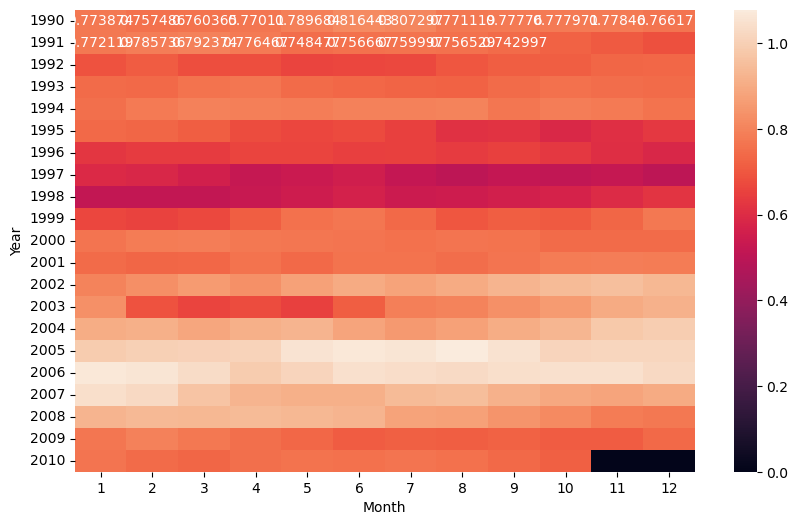

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

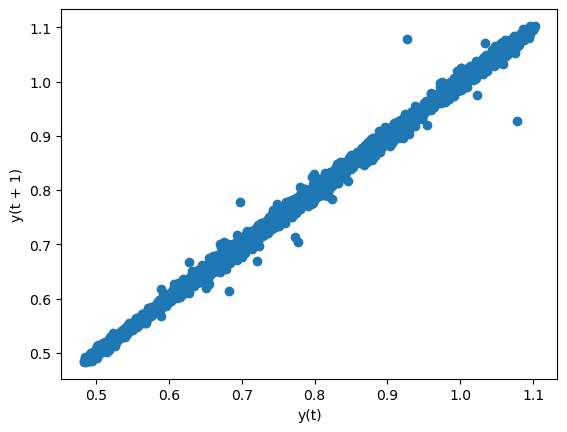

In [30]:
#### Lag plot
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df["Ex_rate"])
pyplot.show()


# Model Building - ARIMA

C:\Users\jalli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jalli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


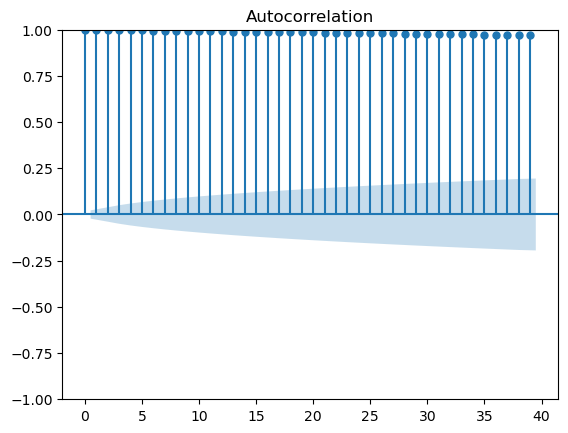

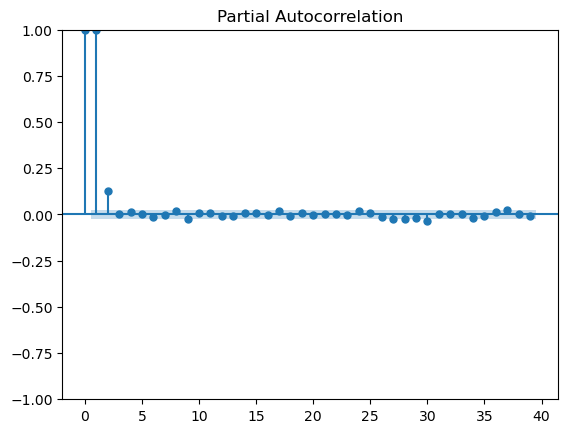

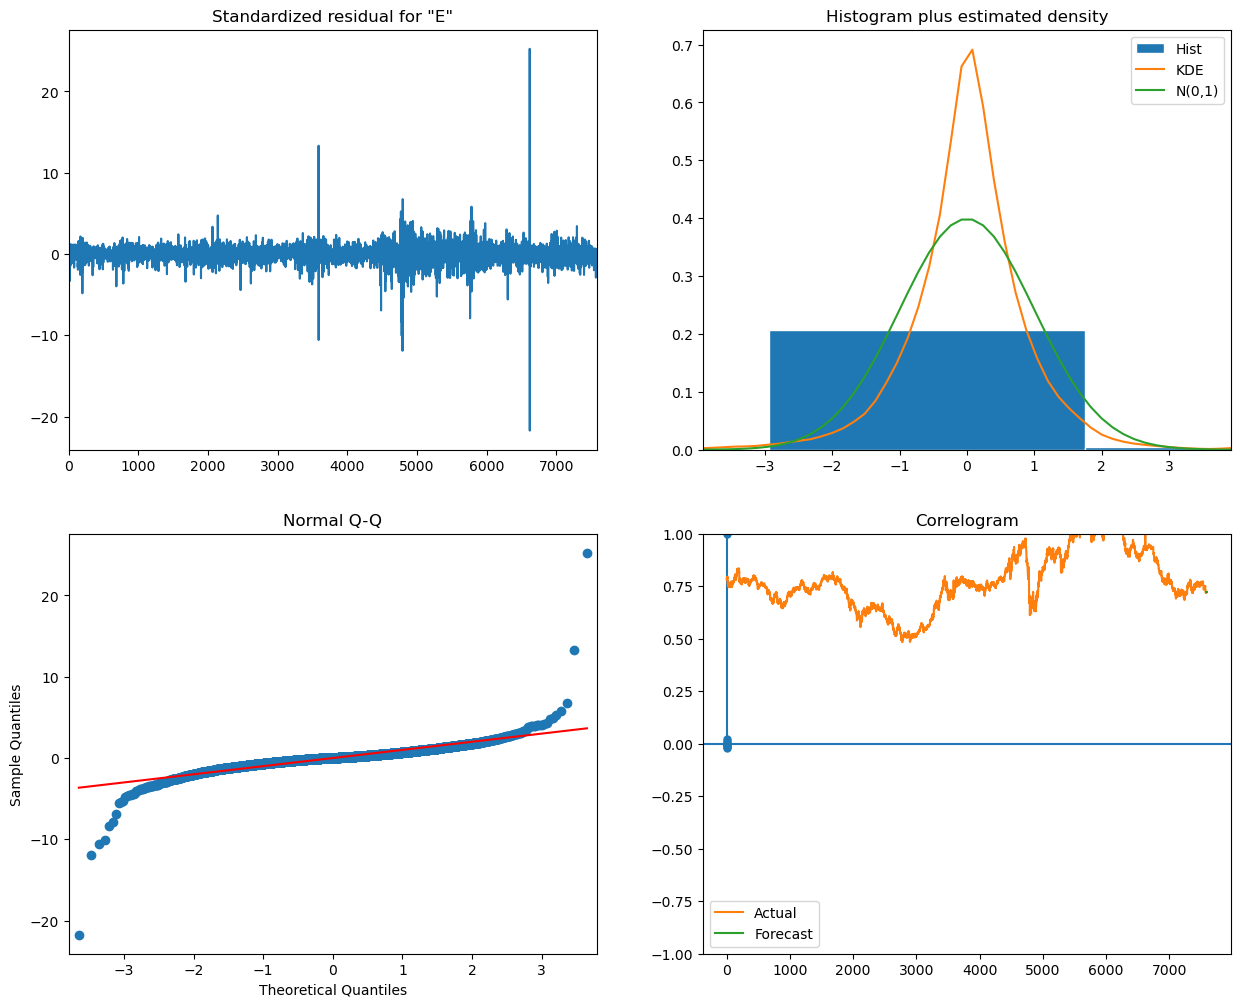

In [54]:
# Import necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Select a currency time series
Y = df['Ex_rate']

# Plot ACF and PACF
plot_acf(Y)
plot_pacf(Y)

# Based on the plots, estimate initial values for p, d, q
p = 2  # number of autoregressive terms
d = 1  # order of differencing
q = 1  # number of moving average terms

# 2. Model Fitting:

# Create and fit the ARIMA model
model = ARIMA(Y, order=(p, d, q))
model_fit = model.fit()

# 3. Diagnostics:

# Check for model adequacy using residual plots
model_fit.plot_diagnostics(figsize=(15, 12))

# Analyze the residual plots for patterns or trends that might indicate model inadequacies.

# 4. Forecasting:

# Perform out-of-sample forecasting
forecast_horizon = 12  # number of periods to forecast
forecast = model_fit.forecast(steps=forecast_horizon)

# Plot the forecasted values
plt.plot(Y, label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

# Model Building - Exponential Smoothing

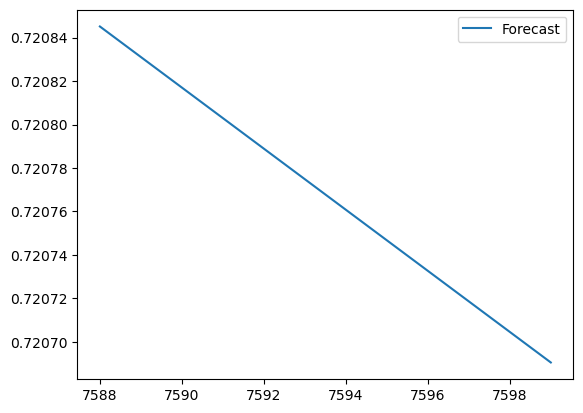

In [56]:
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

time_series = df['Ex_rate']

# Select the appropriate Exponential Smoothing model based on time series characteristics
# For example, if the time series exhibits a trend, choose Holt's Linear model
model = ExponentialSmoothing(time_series, trend='additive')

# Fit the model
model_fit = model.fit()

# Make predictions
forecast_horizon = 12  # number of periods to forecast
forecast = model_fit.forecast(steps=forecast_horizon)
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

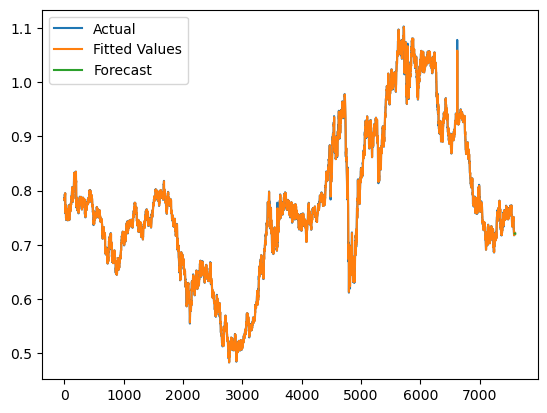

From the graph we can see Holt-Winter is better model for this


In [65]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
time_series = df['Ex_rate']

# 1. Model Selection:

# Simple Exponential Smoothing
model_simple = SimpleExpSmoothing(time_series).fit()

# Holt's Linear Trend Model
model_holt = Holt(time_series).fit()

# Holt-Winters Seasonal Model
model_holt_winters = ExponentialSmoothing(time_series, trend='additive').fit()

# 2. Model Evaluation:

# Calculate the mean squared error (MSE) for each model
mse_simple = np.mean((model_simple.fittedvalues - time_series)**2)
mse_holt = np.mean((model_holt.fittedvalues - time_series)**2)
mse_holt_winters = np.mean((model_holt_winters.fittedvalues - time_series)**2)

# Select the model with the lowest MSE
best_model = None
if mse_simple < mse_holt and mse_simple < mse_holt_winters:
    best_model = model_simple
elif mse_holt < mse_simple and mse_holt < mse_holt_winters:
    best_model = model_holt
else:
    best_model = model_holt_winters
print(best_model)

# 3. Forecasting:

# Forecast the next 12 months using the best model
forecast = best_model.forecast(12)

# Plot the actual time series and the forecasted values
plt.plot(time_series, label='Actual')
plt.plot(best_model.fittedvalues, label='Fitted Values')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()
print('From the graph we can see Holt-Winter is better model for this')

# Evaluation and Comparison

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae_arima = mean_absolute_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))
mae_ets = mean_absolute_error(df['Ex_rate'], model_holt_winters.forecast(steps=len(df)))

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], model_fit.forecast(steps=len(df))))
rmse_ets = np.sqrt(mean_squared_error(df['Ex_rate'], model_holt_winters.forecast(steps=len(df))))

# Calculate MAPE
mape_arima = mean_absolute_percentage_error(df['Ex_rate'], model_fit.forecast(steps=len(df)))
mape_ets = mean_absolute_percentage_error(df['Ex_rate'], model_holt_winters.forecast(steps=len(df)))

# Print the error metrics
print('MAE ARIMA:', mae_arima)
print('RMSE ARIMA:', rmse_arima)
print('MAPE ARIMA:', mape_arima)
print('MAE ETS:', mae_ets)
print('RMSE ETS:', rmse_ets)
print('MAPE ETS:', mape_ets)

MAE ARIMA: 0.14735166284467005
RMSE ARIMA: 0.18909148468955872
MAPE ARIMA: 0.17753634311618552
MAE ETS: 0.13281003284464482
RMSE ETS: 0.1713778422937142
MAPE ETS: 0.16186549245843385


In [ ]:
# 3.	Conclusion